In [15]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

#model Definition
# Scale the input variables
scaler = MinMaxScaler()
# Build the ANN model
model = Sequential()
model.add(Dense(20, input_dim=1, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(3))  # Output layer with 3 neurons for rms 1, 2, and 3

# Load the data
data1 = {
    'Forces': ['10 N', '15 N', '20 N', '25 N', '35 N', '30 N', '40 N', '45 N', '50 N', '55 N', '60 N', '65 N', '70 N', '75 N'],
    'rms 1': [0.09, 0.22, 0.1, 0.19, 0.09, 0.11, 0.1, 0.08, 0.08, 0.09, 0.08, 0.07, 0.06, 0.05],
    'rms 2': [0.25, 0.29, 0.34, 0.2, 0.2, 0.14, 0.22, 0.12, 0.14, 0.09, 0.09, 0.06, 0.12, 0.1],
    'rms 3': [0.2, 0.14, 0.07, 0.11, 0.22, 0.13, 0.12, 0.11, 0.13, 0.09, 0.07, 0.1, 0.09, 0.05] }

df1 = pd.DataFrame(data1)

# Split the data into input (X) and output (y) variables
X1 = df1[['Forces']]
y1 = df1[['rms 1', 'rms 2', 'rms 3']]

# Convert the 'Forces' column to numeric values
X1['Forces'] = X1['Forces'].str.replace(' N', '').astype(int)



X_scaled1 = scaler.fit_transform(X1)



# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_scaled1, y1, epochs=200, batch_size=10, verbose=1)

# Function to predict rms based on force input
def predict_rms(force):
    force_scaled = scaler.transform([[force]])
    prediction = model.predict(force_scaled)[0]
    #return prediction
    mean_rms = np.mean(prediction, axis=0)
    return mean_rms

# Load the data
data2 = {
    'Forces': ['10 N', '15 N', '20 N', '25 N', '35 N', '30 N', '40 N', '45 N', '50 N', '55 N', '60 N', '65 N', '70 N', '75 N'],
    'HOFMs 1': [0.07, 0.21, 0.08, 0.17, 0.06, 0.09, 0.07, 0.06, 0.07, 0.07, 0.06, 0.04, 0.04, 0.02],
    'HOFMs 2': [0.25, 0.29, 0.34, 0.2, 0.2, 0.14, 0.22, 0.12, 0.14, 0.09, 0.09, 0.06, 0.12, 0.1],
    'HOFMs 3': [0.2, 0.14, 0.07, 0.11, 0.22, 0.13, 0.12, 0.11, 0.13, 0.09, 0.07, 0.1, 0.09, 0.05]
}

df2 = pd.DataFrame(data2)

# Split the data into input (X) and output (y) variables
X2 = df2[['Forces']]
y2 = df2[['HOFMs 1', 'HOFMs 2', 'HOFMs 3']]

# Convert the 'Forces' column to numeric values
X2['Forces'] = X2['Forces'].str.replace(' N', '').astype(int)

X_scaled2 = scaler.fit_transform(X2)

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_scaled2, y2, epochs=200, batch_size=10, verbose=1)

# Function to predict HOFMs based on force input
def predict_hofms(force):
    force_scaled = scaler.transform([[force]])
    prediction_H = model.predict(force_scaled)[0]
    #return prediction
    mean_hofms = np.mean(prediction_H, axis=0)
    return mean_hofms
print(predict_hofms(10),predict_rms(10))




Epoch 1/200


<ipython-input-15-66062d4e571d>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1['Forces'] = X1['Forces'].str.replace(' N', '').astype(int)


2/2 [==============================] - 1s 8ms/step - loss: 0.0575
Epoch 2/200
2/2 [==============================] - 0s 11ms/step - loss: 0.0511
Epoch 3/200
2/2 [==============================] - 0s 9ms/step - loss: 0.0447
Epoch 4/200
2/2 [==============================] - 0s 7ms/step - loss: 0.0395
Epoch 5/200
2/2 [==============================] - 0s 9ms/step - loss: 0.0345
Epoch 6/200
2/2 [==============================] - 0s 8ms/step - loss: 0.0301
Epoch 7/200
2/2 [==============================] - 0s 8ms/step - loss: 0.0263
Epoch 8/200
2/2 [==============================] - 0s 8ms/step - loss: 0.0230
Epoch 9/200
2/2 [==============================] - 0s 8ms/step - loss: 0.0200
Epoch 10/200
2/2 [==============================] - 0s 7ms/step - loss: 0.0175
Epoch 11/200
2/2 [==============================] - 0s 8ms/step - loss: 0.0154
Epoch 12/200
2/2 [==============================] - 0s 6ms/step - loss: 0.0136
Epoch 13/200
2/2 [==============================] - 0s 7ms/step - loss: 

<ipython-input-15-66062d4e571d>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2['Forces'] = X2['Forces'].str.replace(' N', '').astype(int)


2/2 [==============================] - 1s 8ms/step - loss: 0.0016
Epoch 2/200
2/2 [==============================] - 0s 9ms/step - loss: 0.0015
Epoch 3/200
2/2 [==============================] - 0s 8ms/step - loss: 0.0014
Epoch 4/200
2/2 [==============================] - 0s 11ms/step - loss: 0.0014
Epoch 5/200
2/2 [==============================] - 0s 8ms/step - loss: 0.0014
Epoch 6/200
2/2 [==============================] - 0s 9ms/step - loss: 0.0015
Epoch 7/200
2/2 [==============================] - 0s 9ms/step - loss: 0.0014
Epoch 8/200
2/2 [==============================] - 0s 8ms/step - loss: 0.0014
Epoch 9/200
2/2 [==============================] - 0s 7ms/step - loss: 0.0014
Epoch 10/200
2/2 [==============================] - 0s 6ms/step - loss: 0.0014
Epoch 11/200
2/2 [==============================] - 0s 7ms/step - loss: 0.0014
Epoch 12/200
2/2 [==============================] - 0s 7ms/step - loss: 0.0014
Epoch 13/200
2/2 [==============================] - 0s 6ms/step - loss: 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 21ms/step
0.18207145 0.18207145


In [ ]:
num_samples = 999  # Number of samples in the generated EMG signal
num_channels = 1  # Number of channels in the EMG signal
num_clusters = 3  # Number of clusters in the Gaussian Mixture Model

def generate_zero_mean_gmm(num_clusters, num_samples):
    # Generate covariance matrices for each cluster
    covariances = [np.eye(num_samples) for _ in range(num_clusters)]  # Identity matrix as covariance for each cluster

    # Generate weights for each cluster (uniform weights)
    weights = np.ones(num_clusters) / num_clusters

    # Generate GMM samples
    gmm_samples = np.concatenate([
        multivariate_normal.rvs(mean=np.zeros(num_samples), cov=covariances[i], size=int(num_samples * weights[i]))
        for i in range(num_clusters)
    ])

    return gmm_samples

# Get force input from the user
force_input = 10


# Predict rms and hofms
accurate_rms = predict_rms(force_input)
accurate_hofms = predict_hofms(force_input)
gmm_samples = generate_zero_mean_gmm(num_clusters, num_samples)  # Generate GMM samples

emg_signal = accurate_hofms * accurate_rms + gmm_samples  # Combine HOFMs, RMS, and GMM
time = np.arange(num_samples)

# convert to combatible format
input_array = emg_signal
output_array = input_array * 100 + 400 #to shift range
print(output_array.flatten())






plt.plot(time, emg_signal)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Generated EMG Signal')
plt.show()
print(emg_signal)



1/1 [==============================] - 0s 27ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


For force 30 N, predicted HOFMs: 0.1481265276670456
[325.54263922 329.20013638 470.20707443 ... 384.5728861  362.67335203
 333.90535202]


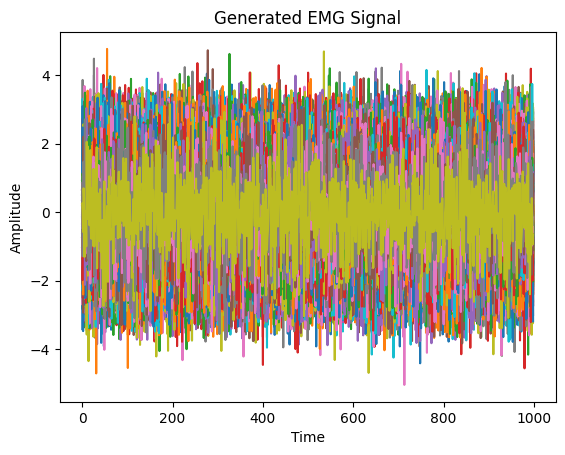

1/1 [==============================] - 0s 29ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


For force 40 N, predicted HOFMs: 0.1281687617301941
[490.98948187 214.31735463 416.66668256 ... 331.29300161 523.0856654
 483.55079026]


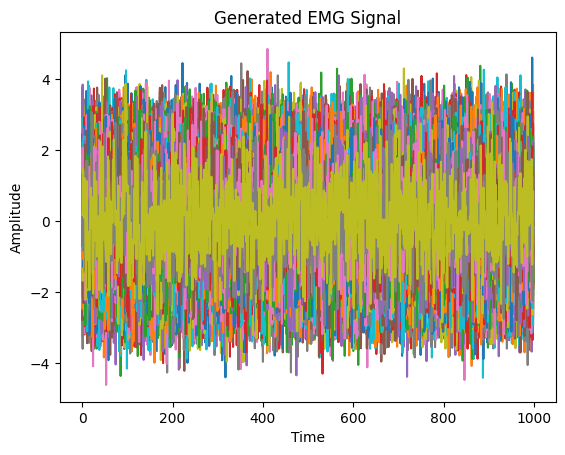

1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


For force 50 N, predicted HOFMs: 0.105427086353302
[332.61776723 321.31645648 482.85370069 ... 448.2898472  459.08128977
 442.49048916]


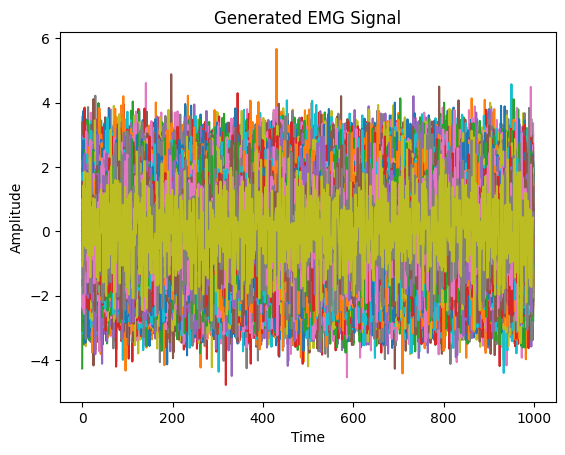

In [12]:
# Example predictions
forces = [30, 40, 50]  # Example force values
for force in forces:
    prediction = predict_hofms(force)
    print(f"For force {force} N, predicted HOFMs: {prediction}")
    gmm_samples = generate_zero_mean_gmm(num_clusters, num_samples)  # Generate GMM samples
    emg_signal = accurate_hofms * accurate_rms + gmm_samples  # Combine HOFMs, RMS, and GMM
    time = np.arange(num_samples)
    # convert to combatible format
    input_array = emg_signal
    output_array = input_array * 100 + 400 #to shift range
    print(output_array.flatten())
    plt.plot(time, emg_signal)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('Generated EMG Signal')
    plt.show()



In [13]:
import numpy as np

# Input array
input_array = emg_signal
# Multiply by 100 and add 400
output_array = input_array * 100 + 400

print(output_array.flatten())


[332.61776723 321.31645648 482.85370069 ... 448.2898472  459.08128977
 442.49048916]


In [ ]:
import serial
import time

arduino=serial.Serial('COM1', 9600)
time.sleep(2)

print("Enter  1 to turn ON LED and 0 to turn OFF LED")

while 1:

    force_input = float(input('Enter the force value (in N): '))

    if force_input == 0:
        arduino.write(b'0')
        print("LED  turned ON")
    elif
        rms_prediction = predict_rms(force_input)
        hofms_prediction = predict_hofms(force_input)
        accurate_rms = get_accurate_rms(rms_prediction)
        accurate_hofms = get_accurate_hofms(hofms_prediction)
        gmm_samples = generate_zero_mean_gmm(num_clusters, num_samples)  # Generate GMM samples
        rms_value = accurate_hofms# Example: Generate random RMS values
        hofms_value = accurate_rms # Example: Generate random 2nd order HOFMs values
        emg_signal = hofms_value * rms_value + gmm_samples
        time = np.arange(num_samples)